In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
current_df = pd.read_csv("final_merged.csv")
divi_df = pd.read_csv("dividends.csv")
portfolio_df = pd.read_csv("price_returns.csv")

In [68]:
current_df.sort_index(inplace=True)
divi_df.sort_index(inplace=True)
portfolio_df.sort_index(inplace=True)

In [69]:
divi_df.head(10)

,PERMNO,date,TICKER,DIVAMT
0,10225,31/01/1962,NaN,NaN
1,10225,28/02/1962,NaN,0.750
2,10225,30/03/1962,NaN,NaN
3,10225,30/04/1962,NaN,NaN
4,10225,31/05/1962,NaN,0.375
5,10225,31/05/1962,NaN,0.000
6,10225,29/06/1962,NaN,NaN
7,10225,31/07/1962,AT,NaN
8,10225,31/08/1962,AT,0.375
9,10225,28/09/1962,AT,NaN


In [70]:
current_df.dtypes

Unnamed: 0                      object
ABEV                           float64
ABUD                           float64
ABV                            float64
ABW                            float64
                                ...   
Excess Return on the Market    float64
SMB                            float64
HML                            float64
MOM                            float64
USREC                            int64
Length: 103, dtype: object

In [71]:
divi_df.dtypes

PERMNO      int64
date       object
TICKER     object
DIVAMT    float64
dtype: object

In [72]:
current_df["Unnamed: 0"] = pd.to_datetime(current_df["Unnamed: 0"], infer_datetime_format = True)
divi_df.rename(columns = {"date": "Date"}, inplace=True)
divi_df["Date"] = pd.to_datetime(divi_df["Date"], infer_datetime_format = True)

In [73]:
current_df.rename(columns = {"Unnamed: 0": "Date"}, inplace=True)
current_df.set_index("Date", inplace=True)
# divi_df.set_index("date", inplace=True)

In [74]:
current_df

,ABEV,ABUD,ABV,ABW,ACCOB,ADC,ADSO,AED,AFTI,BACA,...,VO,FARM,GMCR,JVA,PEET,Excess Return on the Market,SMB,HML,MOM,USREC
Date,,,,,,,,,,,,,,,,,,,,,
1962-07-31,NaN,NaN,NaN,NaN,NaN,37.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0628,0.0163,-0.0357,0.0055,0
1962-08-31,NaN,NaN,NaN,NaN,NaN,37.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0213,0.0125,-0.0121,-0.0058,0
1962-09-30,NaN,NaN,NaN,NaN,NaN,37.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.0522,-0.0248,0.0134,0.0395,0
1962-10-31,NaN,NaN,NaN,NaN,NaN,33.375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.0005,-0.0401,0.0135,0.0075,0
1962-11-30,NaN,NaN,NaN,2.5,NaN,39.625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1087,0.0259,0.0099,-0.0717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.29,NaN,3.19,NaN,0.0763,-0.0022,-0.0293,0.0051,0
2020-09-30,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.42,NaN,3.48,NaN,-0.0363,-0.0004,-0.0266,0.0305,0
2020-10-31,2.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.47,NaN,3.81,NaN,-0.0210,0.0439,0.0419,-0.0303,0


In [75]:
portfolio_df

,Date,BEAM,BEER,PFB,ABW,GBL,RUP,CNB,CKB,FAL,...,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,PTT
0,1962-08-31,NaN,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-30,NaN,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.069767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,NaN,0.021390,0.069444,NaN,0.082609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.028112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.087205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
divi_df

,PERMNO,Date,TICKER,DIVAMT
0,10225,1962-01-31,NaN,NaN
1,10225,1962-02-28,NaN,0.750
2,10225,1962-03-30,NaN,NaN
3,10225,1962-04-30,NaN,NaN
4,10225,1962-05-31,NaN,0.375
...,...,...,...,...
30813,93406,2019-02-28,BORN,NaN
30814,93406,2019-03-29,BORN,NaN
30815,93406,2019-04-30,BORN,NaN
30816,93406,2019-05-31,BORN,NaN


In [77]:
divi_pivot = divi_df.pivot_table(index = divi_df["Date"], columns = "TICKER", values = "DIVAMT", aggfunc="first")
divi_pivot.sort_index(inplace=True)
divi_pivot

TICKER,ABEV,ABUD,ABV,ABW,ACCOB,ADC,ADSO,AED,AFTI,ALEC,...,TAP,TFI,THTR,TYLR,URS,VCGH,VCO,VO,WINEA,WINEB
Date,,,,,,,,,,,,,,,,,,,,,
1962-07-31,NaN,NaN,NaN,NaN,NaN,0.300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-10-31,NaN,NaN,NaN,NaN,NaN,0.300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,NaN,NaN,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,...,NaN,0.08133,NaN,NaN,NaN,NaN,NaN,0.6628,NaN,NaN
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.08312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.08016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop first and last rows of divi_pivot to match the shape with portfolio df

In [78]:
# Drop first and last 
divi_pivot.drop(divi_pivot.head(1).index, inplace=True)
divi_pivot.drop(divi_pivot.tail(1).index, inplace=True)


In [79]:
divi_pivot

TICKER,ABEV,ABUD,ABV,ABW,ACCOB,ADC,ADSO,AED,AFTI,ALEC,...,TAP,TFI,THTR,TYLR,URS,VCGH,VCO,VO,WINEA,WINEB
Date,,,,,,,,,,,,,,,,,,,,,
1962-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-10-31,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-31,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.08215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,0.60,NaN,NaN,NaN,NaN,...,NaN,0.08133,NaN,NaN,NaN,NaN,NaN,0.6628,NaN,NaN
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.08312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
portfolio_df

,Date,BEAM,BEER,PFB,ABW,GBL,RUP,CNB,CKB,FAL,...,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,PTT
0,1962-08-31,NaN,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-30,NaN,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.069767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,NaN,0.021390,0.069444,NaN,0.082609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.028112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.087205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tables are equally shaped. Use indexes to derive returns (?)

## Filter only matching columns
- The divi data set has more columns than the portfolio

In [81]:
# Dropping portfolio specific values
portfolio_stripped = portfolio_df
portfolio_stripped

,Date,BEAM,BEER,PFB,ABW,GBL,RUP,CNB,CKB,FAL,...,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,PTT
0,1962-08-31,NaN,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-30,NaN,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.069767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,NaN,0.021390,0.069444,NaN,0.082609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.028112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.087205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
common_cols = portfolio_stripped.columns.intersection(divi_pivot.reset_index().columns)

len(common_cols)

84

The length of the intersection between the portfolio and dividend dataframes indicate that we LOSE some columns. 

Assume columns lost do not have dividend data available (?)

In [83]:
common_cols

Index(['Date', 'BEAM', 'PFB', 'ABW', 'GBL', 'RUP', 'CNB', 'CKB', 'FAL', 'FALB',
       'DRE', 'NBW', 'GENBB', 'RG', 'RGLD', 'SLZ', 'SFR', 'KNBWY', 'LONE',
       'GHB', 'ABUD', 'BUD', 'ACCOB', 'RKY', 'TAP', 'PABT', 'OLYB', 'PTBC',
       'HAN', 'BAS', 'SXC', 'CU', 'CCU', 'HOOK', 'BREW', 'SAM', 'CFN', 'BRH',
       'ABV', 'ABEV', 'AED', 'MLB', 'LQU', 'ROX', 'CREG', 'FO', 'MWGP', 'MGPI',
       'AFTI', 'DR', 'CUE', 'BACA', 'BBRL', 'ADC', 'SH', 'DCS', 'VO', 'HIR',
       'CHLN', 'CGAS', 'BJD', 'BFD', 'BF', 'CDL', 'DIL', 'GDS', 'SBR', 'HBL',
       'TFI', 'HTC', 'JACQ', 'BBR', 'CDG', 'STZ', 'RAIN', 'TYLR', 'THTR',
       'DEO', 'RUM', 'VCO', 'ADSO', 'NDC', 'GWT', 'CEDC'],
      dtype='object')

In [84]:
portfolio_truncate = portfolio_stripped[common_cols]
portfolio_truncate.head()

,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,1962-08-31,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-30,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.069767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,0.021390,0.069444,NaN,0.082609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.028112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reorder columns to match

In [85]:
divi_pivot.reset_index(inplace=True)
divi_truncate = divi_pivot[common_cols]
divi_truncate

TICKER,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,1962-08-31,NaN,NaN,NaN,NaN,NaN,0.08353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,NaN,0.09285,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.2081,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
portfolio_truncate = portfolio_truncate[divi_truncate.columns]
portfolio_truncate

,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,1962-08-31,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-30,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.069767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,0.021390,0.069444,NaN,0.082609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.028112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.087205,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
current_df.reset_index(inplace=True)
prices_truncate = current_df[common_cols]
prices_truncate = prices_truncate[divi_truncate.columns]
prices_truncate = prices_truncate.drop(prices_truncate.head(1).index)
prices_truncate

,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
1,1962-08-31,NaN,2.875,NaN,1.375,13.3125,9.000,NaN,32.250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-09-30,NaN,2.750,NaN,1.125,12.6875,8.500,NaN,30.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-10-31,NaN,2.375,NaN,0.625,11.6875,9.000,NaN,28.750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-11-30,NaN,NaN,2.5,NaN,11.9375,9.625,NaN,31.125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1962-12-31,NaN,NaN,2.5,NaN,12.1250,10.000,NaN,30.250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,134.399994,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,137.660004,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,130.179993,NaN,NaN,NaN,NaN,NaN,NaN
700,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,154.949997,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# divi_truncate.fillna(0, inplace=True)
# prices_truncate.fillna(0, inplace=True)
# portfolio_truncate.fillna(0, inplace=True)

93 is the original number of stocks in the portfolio. After accounting for dividends, we only have 83. The remaining need to be included again afterwards

# Writing function to apply Dividend calculation
- Parts (Sliced to remove non-dividend paying stocks):
    1. % Price return table 
    2. Dividend table
    3. Prices table


- For a month that has a dividend calculation, take that month's divi and divide by LAST months price (index-1)
- Add the above value to the portfolio df to get total return
- Recalculate weights

In [89]:
counter = 0
def calculateDivi(row, column):
    global counter
    counter +=1
    try:
        if pd.isna(row) == False:
            return row / prices_truncate[column].iloc[counter-2] 
    except:
        return 0

The problem with global variables is that you need to reset them for every iteration, or else the tracking will become off

# Testing function with "FAL"

In [90]:
divi_truncate

TICKER,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,1962-08-31,NaN,NaN,NaN,NaN,NaN,0.08353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-10-31,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-11-30,NaN,NaN,NaN,NaN,NaN,0.09285,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.2081,NaN,NaN,NaN,NaN,NaN,NaN
697,2020-09-30,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
test_series = divi_truncate["FAL"].apply(calculateDivi, column = "FAL") 
counter = 0

In [92]:
test_series

0           NaN
1      0.010078
2           NaN
3           NaN
4      0.010442
         ...   
696         NaN
697         NaN
698         NaN
699         NaN
700         NaN
Name: FAL, Length: 701, dtype: float64

CORRECT
$$ 0.010078 = D_t / P_{t-1} = 0.325 / 32.250

# Testing Function with "CNB"

In [93]:
test_series2 = divi_truncate["CNB"].apply(calculateDivi, column = "CNB")
test_series2


0           NaN
1           NaN
2           NaN
3      0.010317
4           NaN
         ...   
696         NaN
697         NaN
698         NaN
699         NaN
700         NaN
Name: CNB, Length: 701, dtype: float64

CORRECT
$$ 0.10317 = D_t / P_{t-1} = 0.09285 / 9.000

# Applying Function to All Columns

In [94]:
divi_returns_df = divi_truncate.copy()
for col in divi_truncate.columns:
    counter = 0
    divi_returns_df[col] = divi_truncate[col].apply(calculateDivi, column = col)
    counter = 0 # reset global variable

In [95]:
divi_returns_df

TICKER,Date,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010078,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,0.010317,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010442,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.014997,NaN,NaN,NaN,NaN,NaN,NaN
697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NAN + NAN = NAN, avoid converting to 0

In [96]:
test_portfolio = portfolio_truncate.drop("Date", axis = 1).add(divi_returns_df.drop("Date", axis = 1), fill_value = 0)
test_portfolio

,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,DRE,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,NaN,0.117021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.059690,NaN,-0.152381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,NaN,-0.011236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.021390,0.079761,NaN,0.082609,NaN,0.029545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.017671,NaN,0.011236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.072208,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# divi_returns_df.drop("Date", axis = 1).fillna(0) + portfolio_truncate.drop("Date", axis = 1).fillna(0)

In [98]:
test_portfolio

,BEAM,PFB,ABW,GBL,RUP,CNB,CKB,FAL,FALB,DRE,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,NaN,0.095238,NaN,0.100000,0.004717,0.058824,NaN,-0.007692,NaN,0.117021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.043478,NaN,-0.181818,-0.046948,-0.055556,NaN,-0.059690,NaN,-0.152381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.136364,NaN,-0.444444,-0.078818,0.058824,NaN,-0.041667,NaN,-0.011236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.021390,0.079761,NaN,0.082609,NaN,0.029545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.0,NaN,0.015707,0.038961,NaN,-0.017671,NaN,0.011236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.072208,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN


## Re-add missing stocks
93 is the original number of stocks in the portfolio. After accounting for dividends, we only have 83. The remaining need to be included again afterwards

In [99]:
len(portfolio_stripped.columns), len(test_portfolio.columns)

(94, 83)

In [100]:
diff_col = [x for x in portfolio_stripped.columns if x not in test_portfolio.columns]

In [101]:
diff_col

['Date',
 'BEER',
 'GRRR',
 'THT',
 'IBCO',
 'BORN',
 'TFZ',
 'CNWN',
 'CDB',
 'TBVT',
 'PTT']

In [102]:
diff_col.remove("Date")

In [103]:
diff_col

['BEER', 'GRRR', 'THT', 'IBCO', 'BORN', 'TFZ', 'CNWN', 'CDB', 'TBVT', 'PTT']

In [104]:
test_portfolio1 = pd.concat([portfolio_stripped[diff_col],test_portfolio], axis =1 )

In [105]:
test_portfolio1

,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,PTT,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.072208,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN


## Re-constructing proportions

In [106]:
returns_df = test_portfolio1
returns_df

,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,PTT,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.072208,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.190275,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
returns_df.index = prices_truncate["Date"]
returns_df

,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,PTT,...,RAIN,TYLR,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC
Date,,,,,,,,,,,,,,,,,,,,,
1962-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.072208,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.024256,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.054337,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
returns_df["Num_Active_Stocks"] = 93 - returns_df.isnull().sum(axis = 1)
returns_df["Portfolio_Proportion"] = 1 / returns_df["Num_Active_Stocks"]
portfolio_returns = returns_df.mul(returns_df["Portfolio_Proportion"], axis = 0)
portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
portfolio_returns["Portfolio_Returns"] = portfolio_returns.sum(axis = 1)
portfolio_returns["Portfolio_Proportion"] = returns_df["Portfolio_Proportion"]
portfolio_merged = pd.concat([returns_df[["Num_Active_Stocks"]], portfolio_returns], axis = 1, join = "inner")

portfolio_merged

,Num_Active_Stocks,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,...,THTR,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,Portfolio_Returns,Portfolio_Proportion
Date,,,,,,,,,,,,,,,,,,,,,
1962-08-31,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029344,0.050000
1962-09-30,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051437,0.052632
1962-10-31,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047331,0.052632
1962-11-30,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087726,0.058824
1962-12-31,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015082,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.006564,NaN,NaN,NaN,NaN,NaN,NaN,-0.016821,0.090909
2020-09-30,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.002205,NaN,NaN,NaN,NaN,NaN,NaN,0.120705,0.090909
2020-10-31,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.005434,NaN,NaN,NaN,NaN,NaN,NaN,-0.030275,0.100000


<AxesSubplot:title={'center':'Sin Portfolio with Total Returns (Price + Dividend)'}, xlabel='Date'>

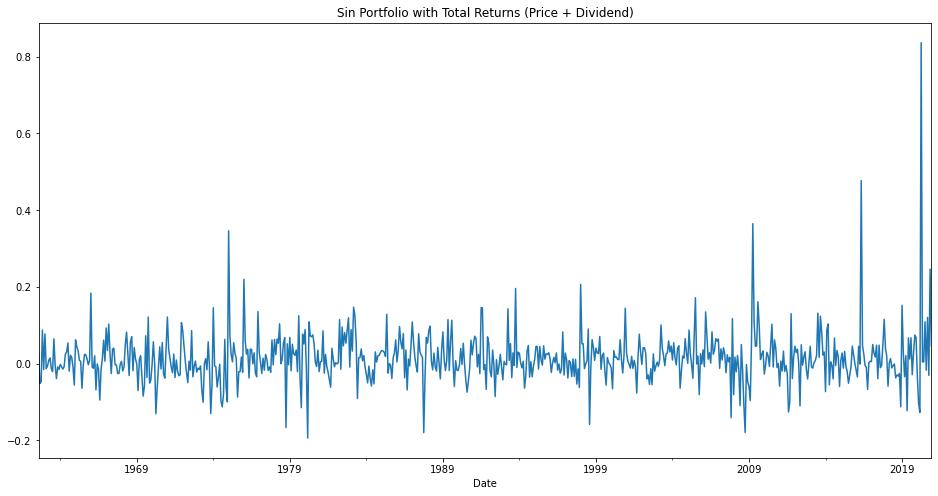

In [114]:
portfolio_merged["Portfolio_Returns"].plot(figsize = (16,8), title = "Sin Portfolio with Total Returns (Price + Dividend)")

In [115]:
portfolio_merged.describe()["Portfolio_Returns"]

count    701.000000
mean       0.014507
std        0.067218
min       -0.193646
25%       -0.016185
50%        0.008287
75%        0.040404
max        0.836589
Name: Portfolio_Returns, dtype: float64

In [116]:
portfolio_merged.to_csv("sin_portfolio_with_dividends.csv")

# Including RFR

In [132]:
rfr = pd.read_csv("risk_free_rate.csv")
rfr.head()

,dateff,rf
0,31/01/1962,0.0024
1,28/02/1962,0.0020
2,30/03/1962,0.0020
3,30/04/1962,0.0022
4,31/05/1962,0.0024


In [133]:
rfr["dateff"] = pd.to_datetime(rfr["dateff"])

In [134]:
from pandas.tseries.offsets import MonthEnd
rfr['dateff'] = rfr["dateff"] + MonthEnd(0)
rfr

,dateff,rf
0,1962-01-31,0.0024
1,1962-02-28,0.0020
2,1962-03-31,0.0020
3,1962-04-30,0.0022
4,1962-05-31,0.0024
...,...,...
720,2022-01-31,0.0000
721,2022-02-28,0.0000
722,2022-03-31,0.0000
723,2022-04-30,0.0000


In [135]:
rfr.set_index("dateff", inplace=True)

In [137]:
portfolio_rfr = pd.concat([portfolio_merged,rfr], axis = 1, join = "inner")
portfolio_rfr

,Num_Active_Stocks,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,...,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,Portfolio_Returns,Portfolio_Proportion,rf
1962-08-31,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029344,0.050000,0.0023
1962-09-30,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051437,0.052632,0.0021
1962-10-31,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047331,0.052632,0.0025
1962-11-30,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087726,0.058824,0.0020
1962-12-31,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015082,0.055556,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.006564,NaN,NaN,NaN,NaN,NaN,NaN,-0.016821,0.090909,0.0001
2020-09-30,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002205,NaN,NaN,NaN,NaN,NaN,NaN,0.120705,0.090909,0.0001
2020-10-31,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005434,NaN,NaN,NaN,NaN,NaN,NaN,-0.030275,0.100000,0.0001
2020-11-30,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019028,NaN,NaN,NaN,NaN,NaN,NaN,0.246420,0.100000,0.0001


In [138]:
portfolio_rfr["Portfolio_Returns"] = portfolio_rfr["Portfolio_Returns"] - portfolio_rfr["rf"]
portfolio_rfr

,Num_Active_Stocks,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,...,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,Portfolio_Returns,Portfolio_Proportion,rf
1962-08-31,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027044,0.050000,0.0023
1962-09-30,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.053537,0.052632,0.0021
1962-10-31,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049831,0.052632,0.0025
1962-11-30,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085726,0.058824,0.0020
1962-12-31,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017382,0.055556,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.006564,NaN,NaN,NaN,NaN,NaN,NaN,-0.016921,0.090909,0.0001
2020-09-30,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002205,NaN,NaN,NaN,NaN,NaN,NaN,0.120605,0.090909,0.0001
2020-10-31,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005434,NaN,NaN,NaN,NaN,NaN,NaN,-0.030375,0.100000,0.0001
2020-11-30,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019028,NaN,NaN,NaN,NaN,NaN,NaN,0.246320,0.100000,0.0001


In [140]:
portfolio_rfr.to_csv("portfolio_returns_divi_rfr.csv")